# Exploratory Data Analysis of bike-rental data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', 100)
# import data set
df = pd.read_csv('hour.csv')

The object of the exploratory analysis is to get a good outline of the dataset and to discover first relations between the variables. The target of our analysis is the column 'cnt' and we want to discover what variables are best for predicting future bike rental numbers per hour. First let's get a basic understandin of what our dataframe looks like.

In [31]:
print(df.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [4]:
print('Dataframe shape: {}\n'.format(df.shape))

Dataframe shape: (17379, 17)



In [33]:
print('Data types of every column')
print(df.info())

Data types of every column
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [6]:
print('Description columns:')
print(df[['casual', 'registered', 'cnt']].describe())

Description columns:
             casual    registered           cnt
count  17379.000000  17379.000000  17379.000000
mean      35.676218    153.786869    189.463088
std       49.305030    151.357286    181.387599
min        0.000000      0.000000      1.000000
25%        4.000000     34.000000     40.000000
50%       17.000000    115.000000    142.000000
75%       48.000000    220.000000    281.000000
max      367.000000    886.000000    977.000000


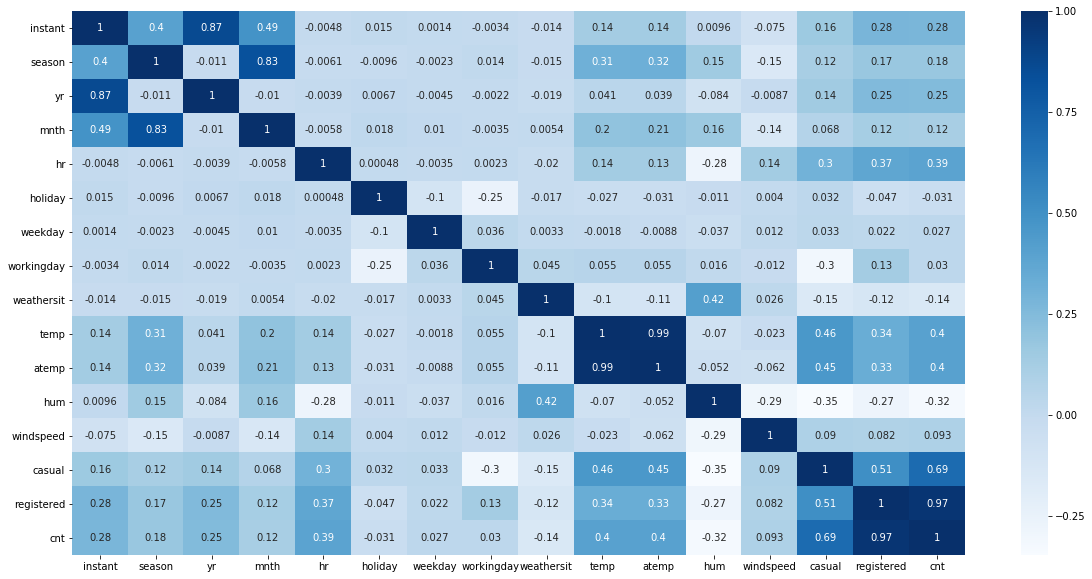

In [22]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.rcParams['figure.figsize'] = (10,5)
plt.show()

## Bike rentals per hour
The biggest correlation from 'cnt' is to 'temp', 'atemp' and 'hour'. In the following the hour of day and temperature will be further investigated. This is shown in two graphs. One for the amount of bike rentals per working day and one per non-working day. The count is scattered and the temperature is shown by the color of each data point. The average is represented by a black line.

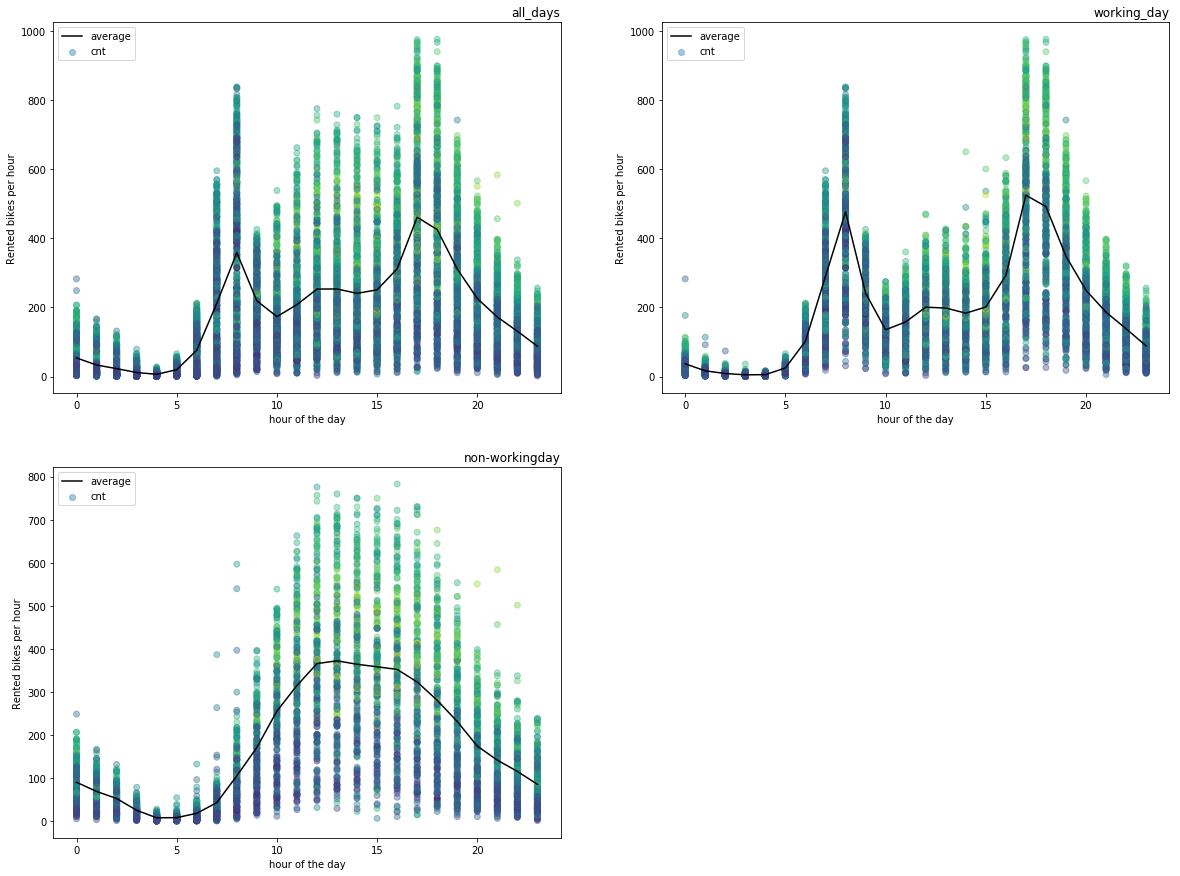

In [29]:
pos = 1
for d in ['all_days', 'working_day', 'non-workingday']:
    if d == 'all_days':
        day = df
    elif d == 'working_day':
        day = df[df['workingday'] == 1]
    elif d == 'non-workingday':
        day = df[df['workingday'] == 0]


    day_hr = day.groupby(['hr']).mean()
    plt.subplot(2, 2, pos)
    pos += 1
    plt.scatter(day['hr'], day['cnt'], c=day['temp'], alpha=0.4)
    plt.plot(day_hr['cnt'], color='0', label='average')
    plt.title(d, loc='right')
    plt.ylabel('Rented bikes per hour')
    plt.xlabel('hour of the day')
    plt.legend(loc='upper left')



plt.rcParams['figure.figsize'] = (20,10)
plt.show()

The graphs show very clearly that on working days the bikes are rented mostly in the morning and late afternoon. With a big drop in rents per hour in the middle of the day. The peaks represent the hours where a normal work day starts and ends, which suggests that the bikes are often used to commute to work and back. 
On non-working days like holidays and weekends the usage is highest from around 10:00 AM to 7:00 PM. On these days people sleep longer and don't have to work, which explains the more evenly distributed usage.

## Usage over entire time span
The following graph shows the number of 'cnt' for the entire time span from January 2011 till December 2012. The temperature is also shown as the color, lighter points representing warmer hours. The average is again represented by a black line.

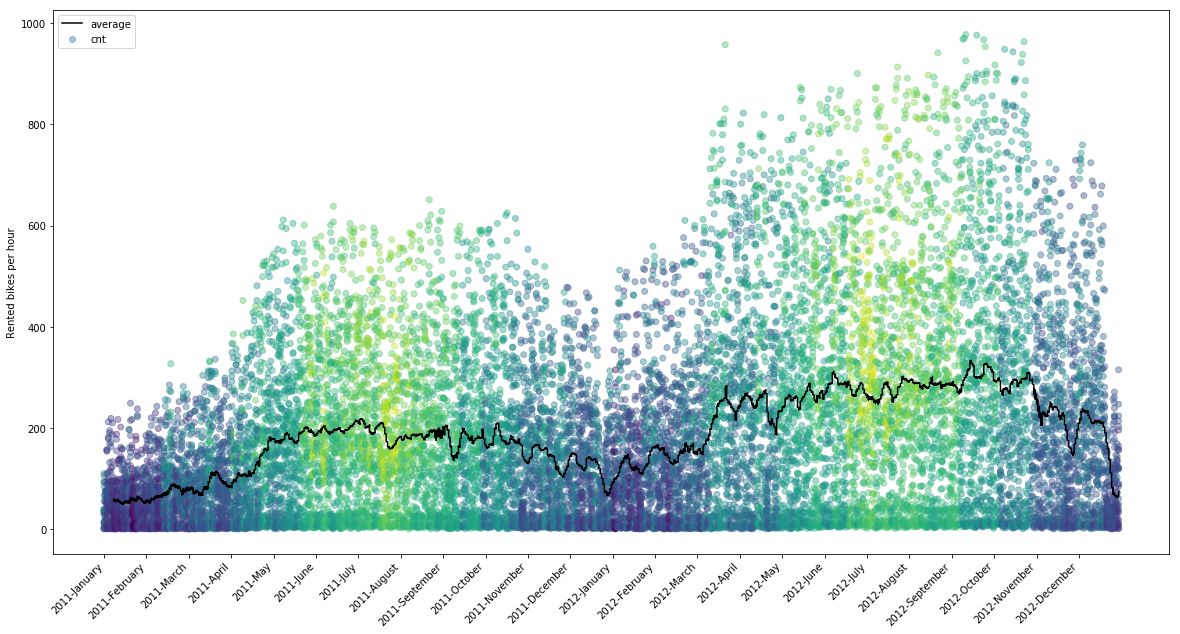

In [30]:
months_xticks = []
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
            'November', 'December']
for i in ['2011', '2012']:
    for j in range(12):
        months_xticks.append(i + '-' + months[j])
locs = [i * 30.5 for i in range(24)]
plt.xticks(locs, months_xticks, rotation=45, horizontalalignment='right')
plt.scatter(df['dteday'], df['cnt'], c=df['temp'], alpha=0.4)
plt.plot(df['dteday'], df['cnt'].rolling(24*7, win_type='boxcar').mean(), color='0', label='average')
plt.ylabel('Rented bikes per hour')
plt.legend(loc='upper left')
plt.rcParams['figure.figsize'] = (20,7)
plt.show()

We can conclude that bike are more rented in the warmer months of the year, clearly shown by the color. Also in 2012 were generally more bikes rented than in 2011, which indicates a trend.